In [1]:
# !pip install top2vec
import numpy as np 
import pandas as pd 
import json
import os
from top2vec import Top2Vec

In [2]:
df = pd.read_csv("/Users/huiwen/Documents/Side Projects/Omdena/omdena-colombia-socialnetwork/Untitled/src/data/task-3-exploratory-data-analysis/Corrected_Final_All.csv", usecols = ["preprocessed_data_without_hashtags"])
df.head()

,preprocessed_data_without_hashtags
0,"['hacer', 'mayo', 'cazar', 'fantasma']"
1,"['despues', 'esperar', 'ancia', 'ahora', 'espe..."
2,"['esperar', 'llegar', 'oido', 'nuevo', 'inicia..."
3,"['menos', 'mes', 'urkullu', 'temer', 'perder',..."
4,"['edicion', 'festival', 'internacional', 'puen..."


In [3]:
doc = df['preprocessed_data_without_hashtags'].values.tolist()

## Train Top2Vec Model

##### Resources used: https://jovian.ai/kamilpolak/top2vec-internet-news-topic-modeling; https://www.kaggle.com/dangelov/covid-19-topic-modeling-and-search-with-top2vec, https://github.com/ddangelov/Top2Vec

#### Parameters:

##### - documents: Input corpus, should be a list of strings.
##### - speed: This parameter will determine how fast the model takes to train. The 'fast-learn' option is the fastest and will generate the lowest quality vectors. The 'learn' option will learn better quality vectors but take a longer time to train. The 'deep-learn' option will learn the best quality vectors but will take significant time to train.
##### - workers: The amount of worker threads to be used in training the model. Larger amount will lead to faster training.

In [4]:
# Train Top2Vec Model
model = Top2Vec(documents=doc, speed="deep-learn", workers=8)

2021-09-19 01:08:38,441 - top2vec - INFO - Pre-processing documents for training
2021-09-19 01:08:39,633 - top2vec - INFO - Creating joint document/word embedding
2021-09-19 01:21:21,686 - top2vec - INFO - Creating lower dimension embedding of documents
2021-09-19 01:21:58,838 - top2vec - INFO - Finding dense areas of documents
2021-09-19 01:22:15,114 - top2vec - INFO - Finding topics


## Explore Top2Vec Discovered Topics

In [5]:
#get the number of topics
model.get_num_topics()

275

In [6]:
#Get Topics
#This will return the topics in decreasing size.
topic_words, word_scores, topic_nums = model.get_topics(272)

In [7]:
#Generate Word Clouds
# for topic in topic_nums[100:105]:
#     model.generate_topic_wordcloud(topic, background_color="black")

In [8]:
#Search Tweets by Topic
#We are going to search by topic 15
documents, document_scores, document_ids = model.search_documents_by_topic(topic_num=15, num_docs=2)


In [9]:
documents, document_scores, document_ids = model.search_documents_by_topic(topic_num=15, num_docs=2)
for doc, score, doc_id in zip(documents, document_scores, document_ids):
    print(f"Tweet: {doc_id}, Score: {score}")
    print("-----------")
    print(doc)
    print("-----------")
    print()

Tweet: 16053, Score: 0.8816661238670349
-----------
['tipico', 'rediuribista', 'envidioso', 'marchar', 'hacer', 'roto']
-----------

Tweet: 1144, Score: 0.8790625929832458
-----------
['si', 'marchar']
-----------



## Similar Keywords

In [10]:
#Search for similar words to colombia
words, word_scores = model.similar_words(keywords=["colombia"], keywords_neg=[], num_words=10)
for word, score in zip(words, word_scores):
    print(f"{word} {score}")

come 0.4242323705786988
class 0.4031104819988281
time 0.38074095990305873
make 0.3802235767768993
economy 0.3682258334817062
middle 0.3659348975620665
venezuela 0.3632397775803101
tax 0.36312872597369533
america 0.36155294915640723
talk 0.3532689376640539


In [11]:
topic_words, word_scores, topic_scores, topic_nums = model.search_topics(keywords=["colombia"], num_topics=5)
topic_nums

array([  2,  45, 208,  21, 154])

In [12]:
topic_scores 
# topic 2 is the most similar to keyowrd, with cosine similarity of 0.359792

array([0.33036384, 0.29599806, 0.27999865, 0.27375148, 0.27316172])

In [13]:
topic_words, word_scores, topic_scores, topic_nums = model.search_topics(keywords=["colombia"], num_topics=10)
topic_nums

array([  2,  45, 208,  21, 154,  13, 102,  63,  38, 101])

In [14]:
topic_scores 
# topic 2 is the most similar to keyowrd, with cosine similarity of 0.359792

array([0.33036384, 0.29599806, 0.27999865, 0.27375148, 0.27316172,
       0.27174497, 0.27054047, 0.26718163, 0.25859011, 0.25688743])

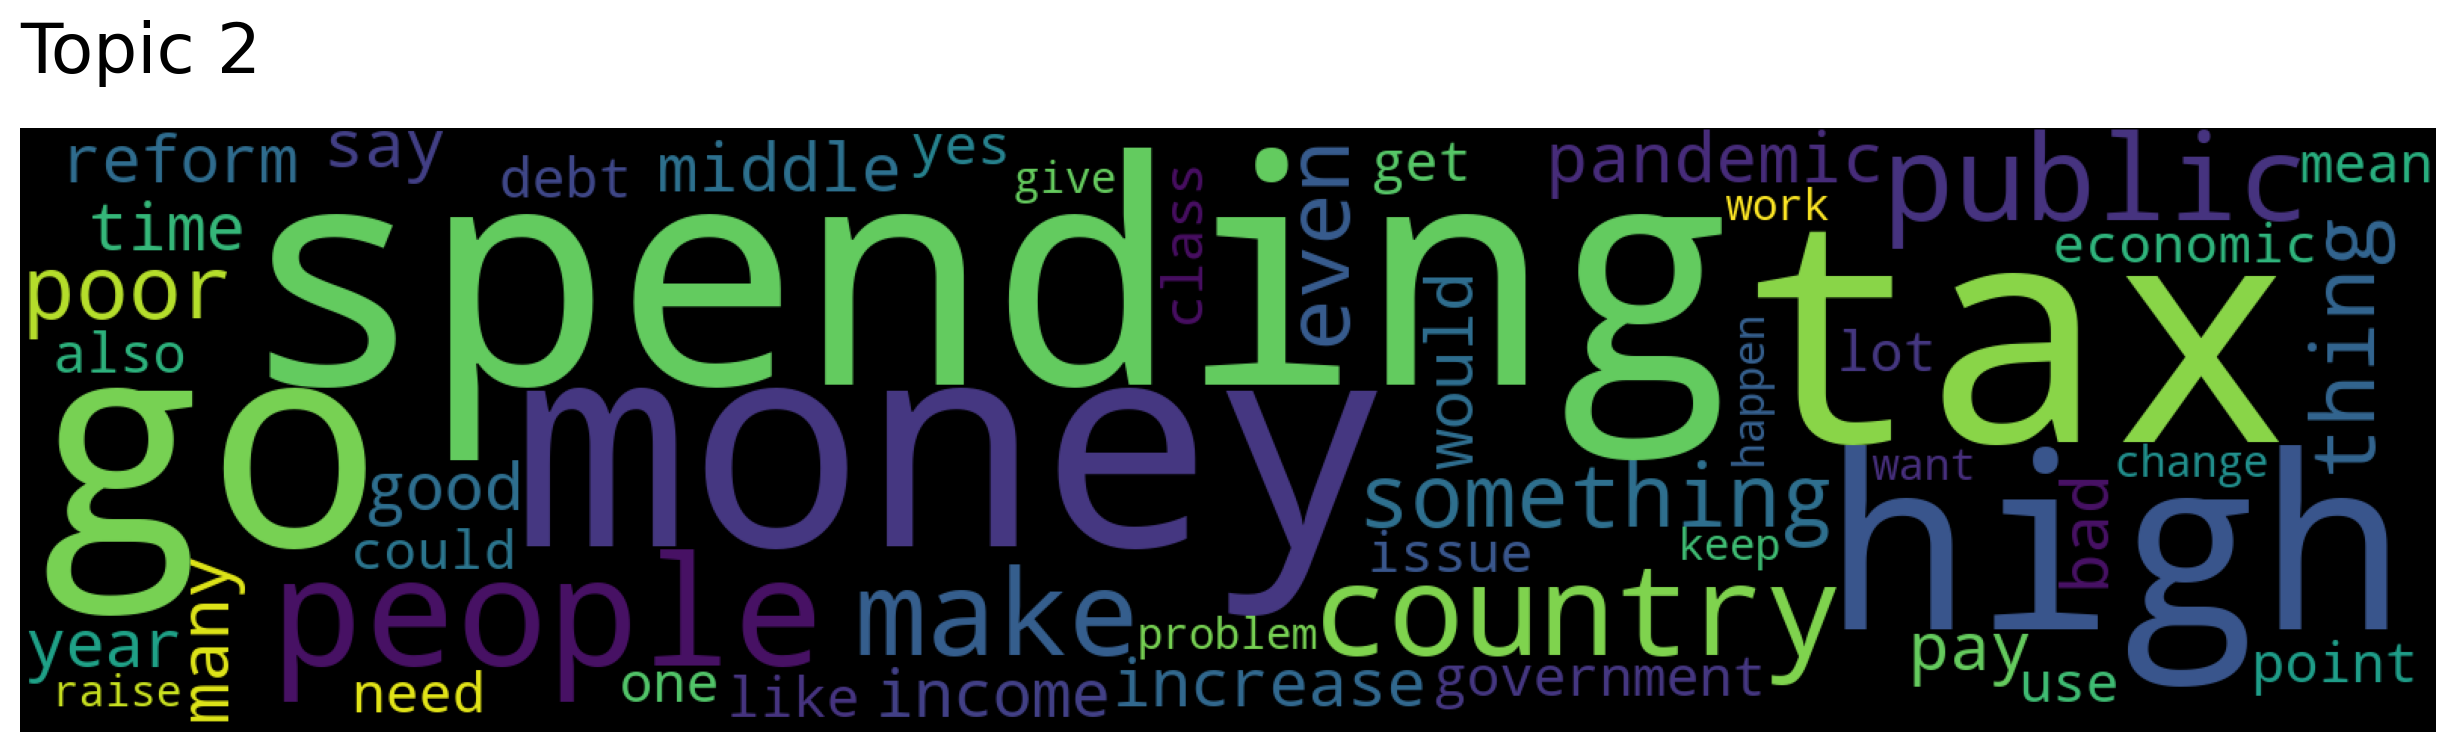

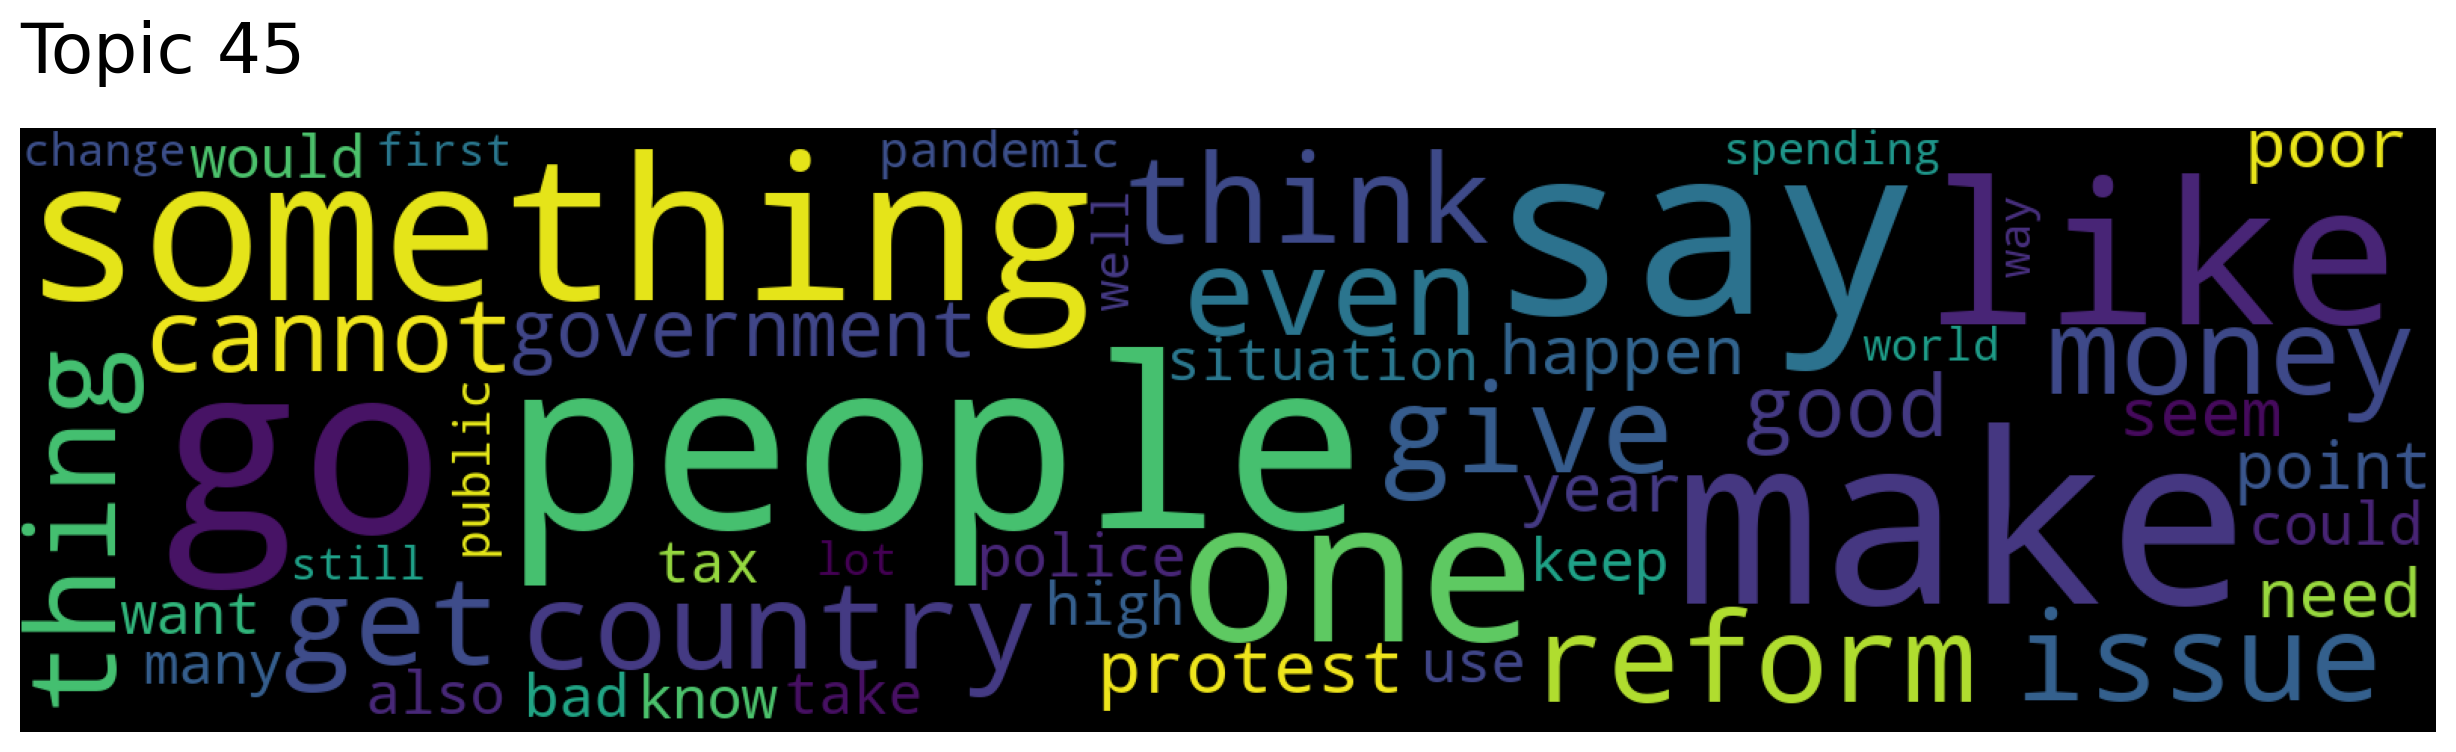

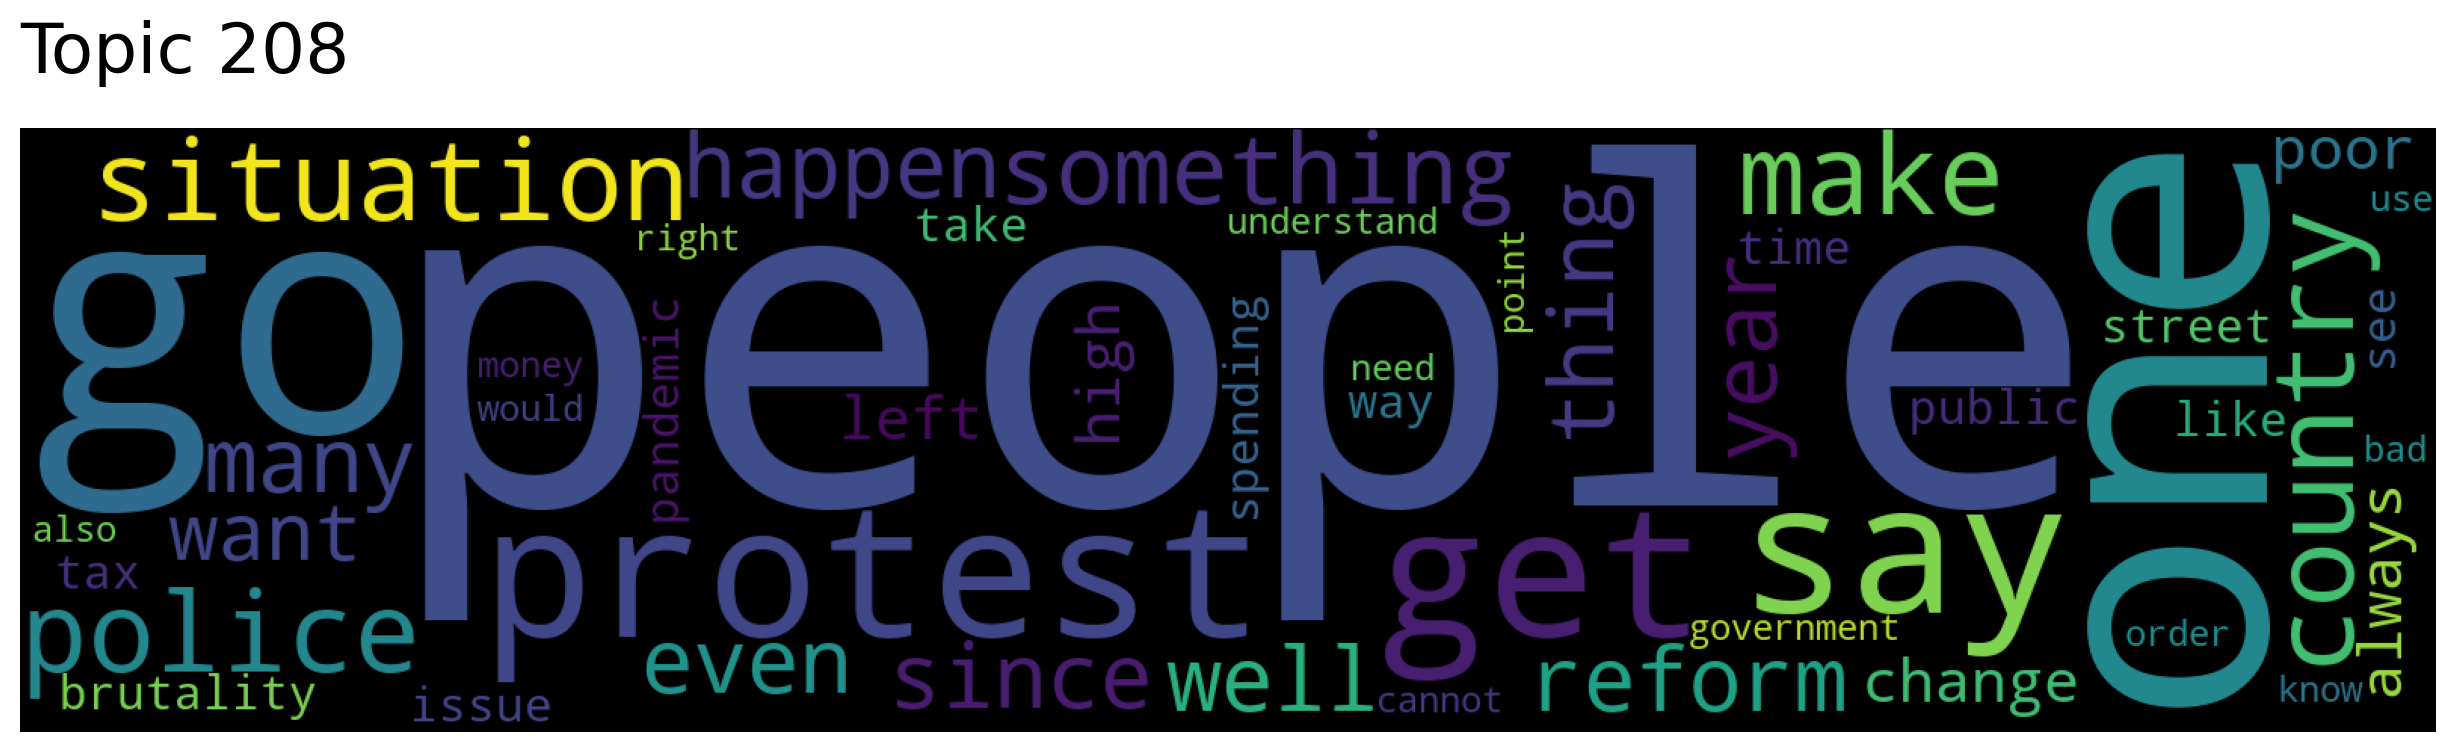

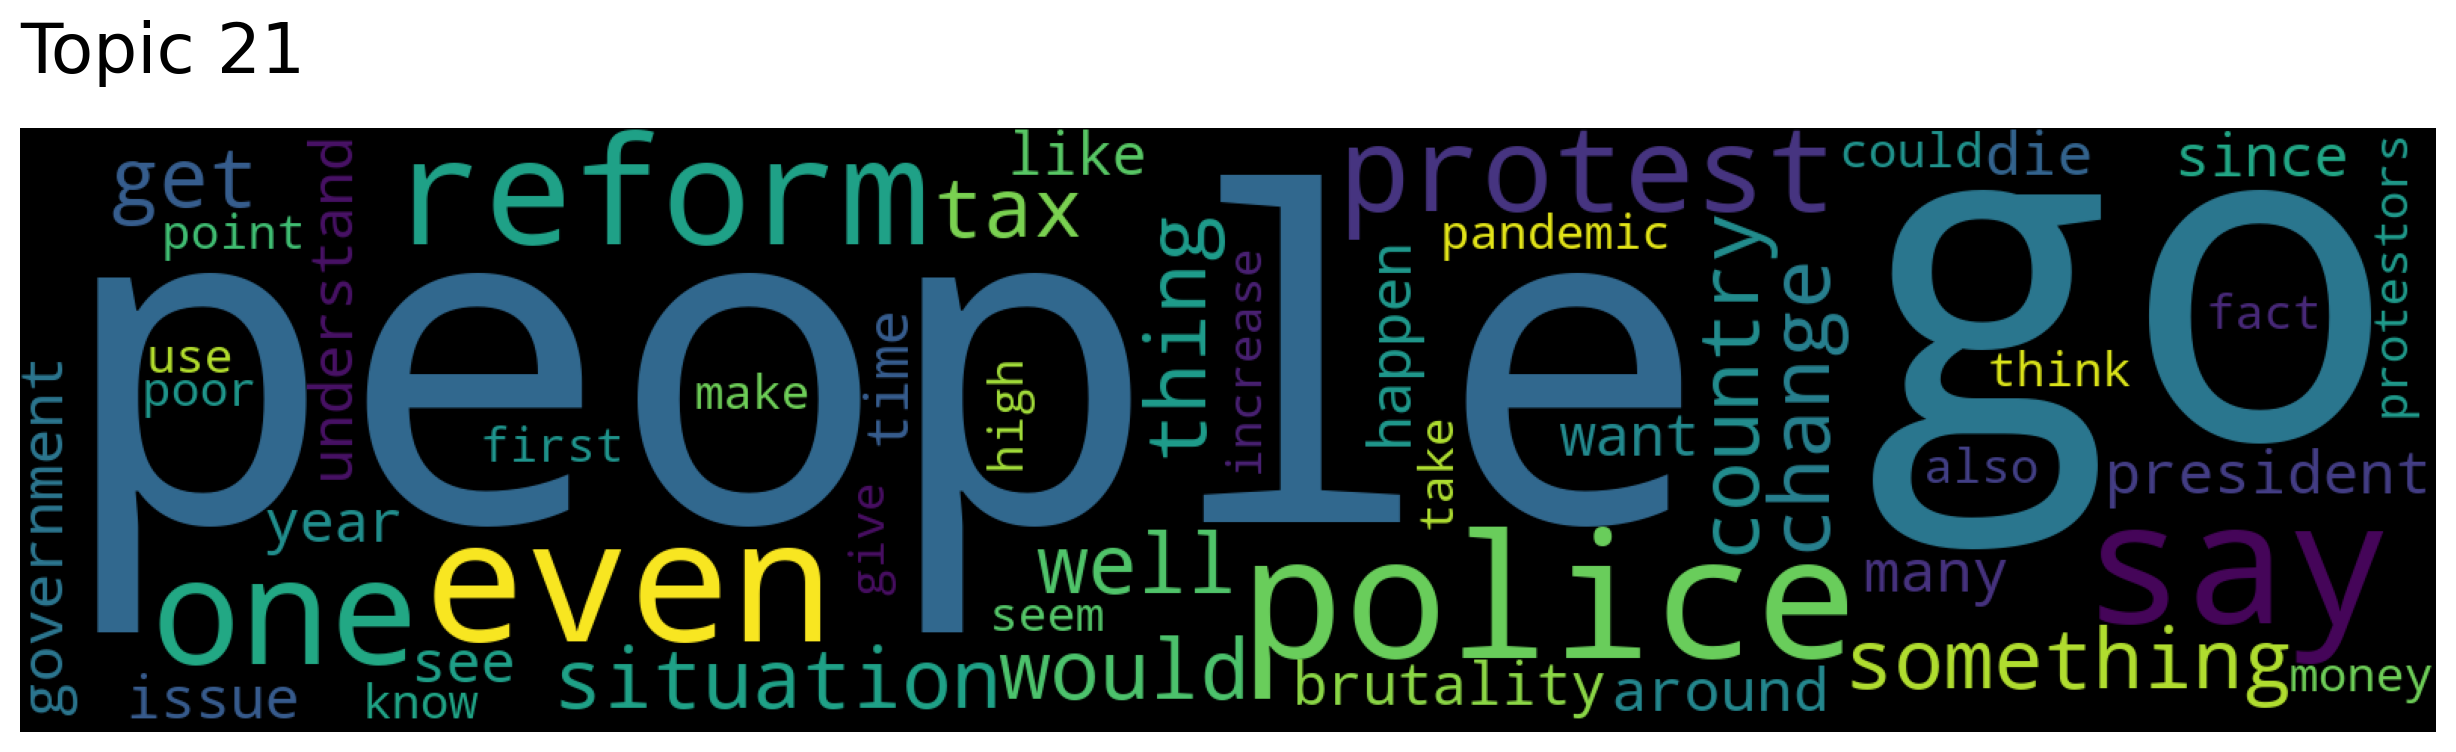

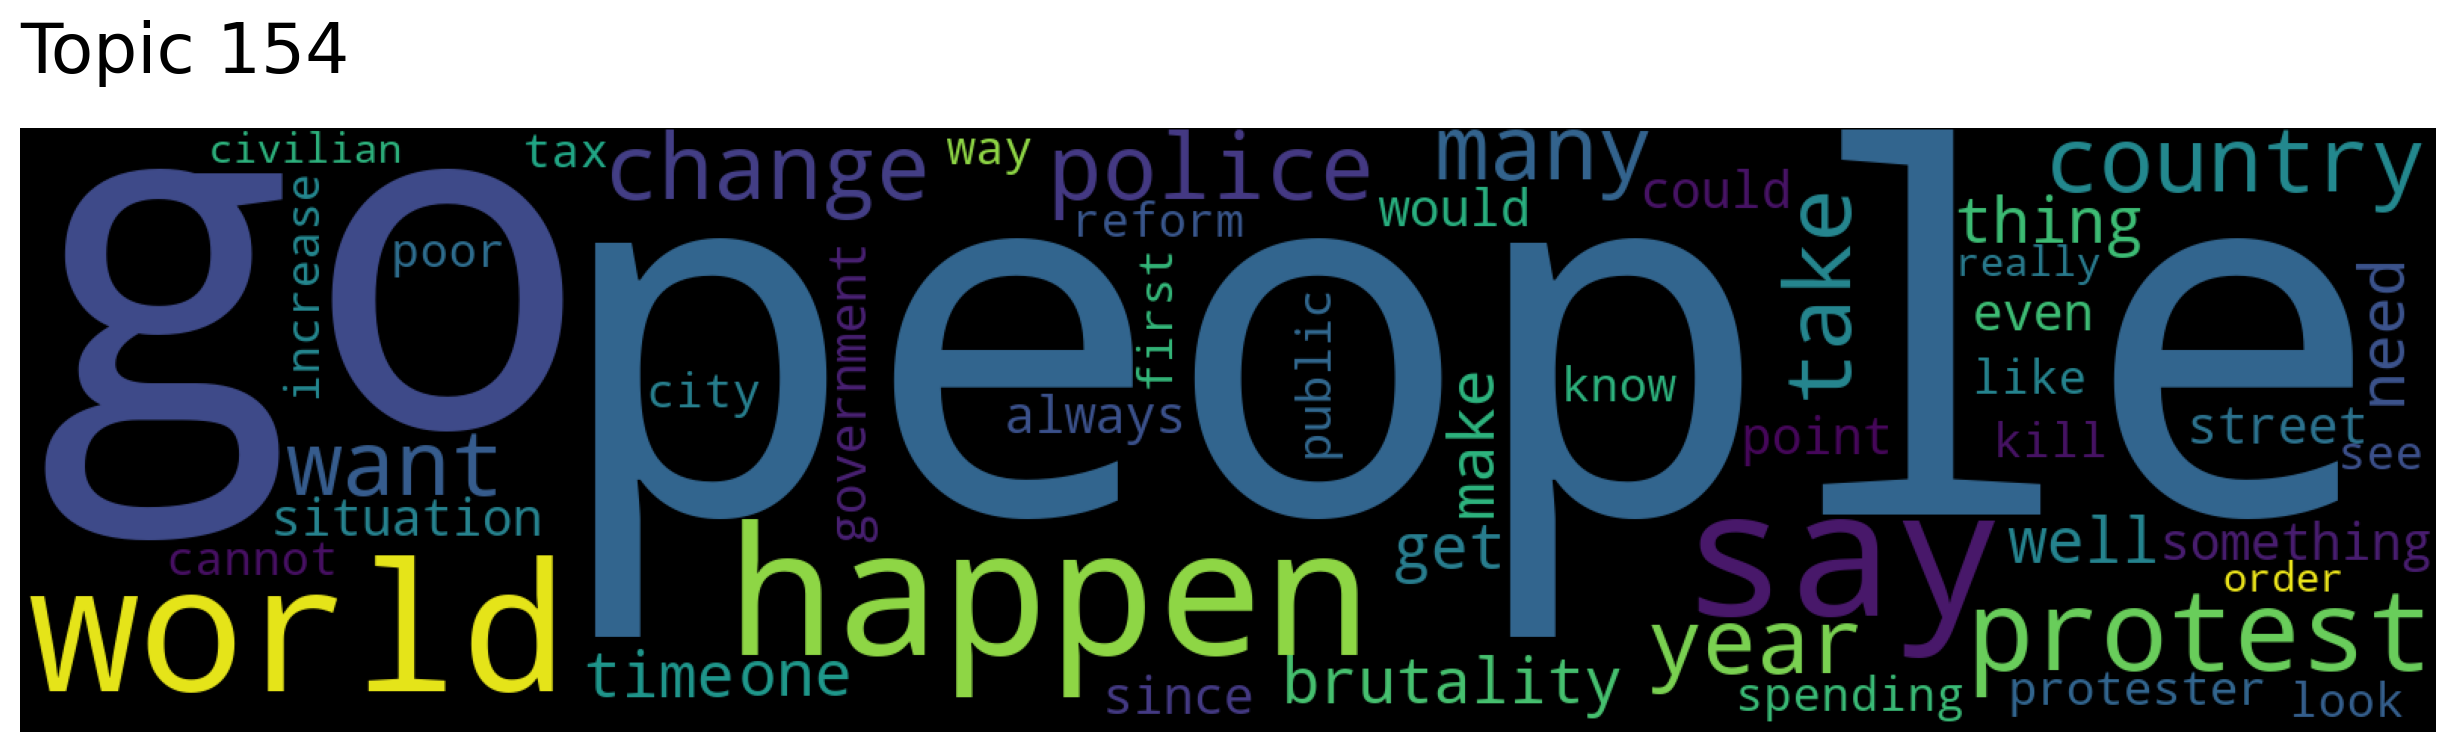

In [15]:
#Discover topics relavant to Colombia - Wordcloud

topic_words, word_scores, topic_scores, topic_nums = model.search_topics(keywords=["colombia"],num_topics=5)
for topic in topic_nums:
    model.generate_topic_wordcloud(topic, background_color="black")

In [16]:
#Search documents by topics

documents, document_scores, document_nums = model.search_documents_by_topic(topic_num=271, num_docs=5)
    
result_df = df.loc[document_nums]
result_df["document_scores"] = document_scores

result_df

for index,row in result_df.iterrows():
    print(f"Document: {index}, Score: {row.document_scores}")
    print("-----------")
    print(f"Section: {row.preprocessed_data_without_hashtags}")
    print("-----------")
    print()

Document: 10728, Score: 0.9953985214233398
-----------
Section: ['ayudar', 'volver', 'casa', 'mas', 'colombiano', 'nino', 'embarazado', 'adulto', 'mayor', 'recurso', 'sostener', 'él', 'auxilio', 'sr', 'ministro', 'evadar', 'mas']
-----------

Document: 10733, Score: 0.9950861930847168
-----------
Section: ['ayudar', 'volver', 'casa', 'mas', 'colombiano', 'nino', 'embarazado', 'adulto', 'mayor', 'recurso', 'sostener', 'él', 'auxilio', 'sr', 'ministro', 'evadar', 'mas']
-----------

Document: 10723, Score: 0.9950111508369446
-----------
Section: ['ayudar', 'volver', 'casa', 'mas', 'colombiano', 'nino', 'embarazado', 'adulto', 'mayor', 'recurso', 'sostener', 'él', 'auxilio', 'sr', 'ministro', 'evadar', 'mas']
-----------

Document: 10718, Score: 0.9949951767921448
-----------
Section: ['ayudar', 'volver', 'casa', 'mas', 'colombiano', 'nino', 'embarazado', 'adulto', 'mayor', 'recurso', 'sostener', 'él', 'auxilio', 'sr', 'ministro', 'evadar', 'mas']
-----------

Document: 10724, Score: 0.99

In [17]:
#Search documents for content semantically similar to 'columbia' and 'strike'

documents, document_scores, document_ids = model.search_documents_by_keywords(keywords=["colombia", "strike"], num_docs=5)
for doc, score, doc_id in zip(documents, document_scores, document_ids):
    print(f"Document: {doc_id}, Score: {score}")
    print("-----------")
    print(doc)
    print("-----------")
    print()


Document: 21596, Score: 0.4740676283836365
-----------
['answer', 'ill', 'try', 'best', 'iván', 'duque', 'current', 'president', 'colombia', 'elect', 'candidate', 'party', 'long', 'time', 'right', 'wing', 'politician', 'yeah', 'right', 'wing', 'álvaro', 'uribe', 'remember', 'battling', 'hard', 'farc', 'guerrilla', 'report', 'death', 'combat', 'man', 'uribe', 'propose', 'constitutional', 'reform', 'president', 'could', 'elect', 'second', 'time', 'third', 'time', 'latter', 'reform', 'rebut', 'constitutional', 'court', 'deem', 'anti', 'democratic', 'around', 'reform', 'lot', 'complaint', 'corruption', 'time', 'investigation', 'number', 'death', 'period', 'time', 'least', 'time', 'people', 'target', 'combatant', 'young', 'innocent', 'people', 'kill', 'present', 'guerrilla', 'soldier', 'mechanic', 'follow', 'people', 'present', 'job', 'opportunity', 'outside', 'city', 'mainly', 'farm', 'kid', 'military', 'force', 'shot', 'change', 'body', 'outfit', 'present', 'guerrilla', 'soldier', 'body',